 # Data Profiling Playbook
 The intention of this notebook is to develop a generic approach to profiling a single column.
 This will take into account:
 - The primary data type of the column - eg if it's a date, we can generate more specialised analytics
 - We may also be able to apply more specialised checks, for example based on REGEX to check national insurance numbers etc.

In [1]:
# Import all of the libraries we need to use...
import pandas as pd
import azureml.dataprep as dprep
import os as os
import re as re
import collections
import seaborn as sns
import pandas_profiling as pp
import datetime
from datetime import datetime
from azureml.dataprep import value
from azureml.dataprep import col
from azureml.dataprep import Dataflow
from commonCode import savePackage, openPackage, createFullPackagePath



In [2]:
# Not used fo now, but should be driven by:
stageNumber = '1'
dataName = 'PEOPLE'
qualityFlag = 'A'
noMissingFlag = True

# For now, I'm cheating, just specifying file.  But will use helper function to build ultimately:
dataFlowFile = './packages/PEOPLE/2/PEOPLE_A_package.dprep'
indexColumn = 'ID'
targetColumn = 'DOB'

In [3]:
dataFlow = Dataflow.open(dataFlowFile)


In [4]:
dataFlow = dataFlow.keep_columns([indexColumn, targetColumn])


In [5]:
dataProfile = dataFlow.get_profile()


In [6]:
dataProfile


,Type,Min,Max,Count,Missing Count,Not Missing Count,Percent missing,Error Count,Empty count,0.1% Quantile,1% Quantile,5% Quantile,25% Quantile,50% Quantile,75% Quantile,95% Quantile,99% Quantile,99.9% Quantile,Mean,Standard Deviation,Variance,Skewness,Kurtosis
DOB,FieldType.DATE,1900-01-01 00:00:00+00:00,2008-10-25 00:00:00+00:00,19147.0,1.0,19146.0,0.000052,0.0,0.0,,,,,,,,,,,,,,
ID,FieldType.INTEGER,17936,36765,19147.0,1.0,19146.0,0.000052,0.0,0.0,17957.5,19834.1,19741,22621.6,27301.9,31965.1,35744,36546.7,36743.4,27298.8,5400.8,2.91686e+07,0.0072681,-1.19487


In [7]:
columnDataProfile = dataProfile.columns[targetColumn]


In [8]:
columnDataProfile


,Statistics
Type,FieldType.DATE
Min,1900-01-01 00:00:00+00:00
Max,2008-10-25 00:00:00+00:00
Count,19147
Missing Count,1
Not Missing Count,19146
Percent missing,5.22275e-05
Error Count,0
Empty count,0
0.1% Quantile,


In [9]:
if columnDataProfile.type == 'FieldType.DATE':
    print('Date Field Detected!')
    # NOTE - what do I need to do to detect date field?


In [10]:
# Add year
columnByExampleBuilder = dataFlow.builders.derive_column_by_example(source_columns = [targetColumn], new_column_name = 'Year')
columnByExampleBuilder.add_example(source_data = {targetColumn : '2008-10-25 00:00:00'}, example_value = '2008')
columnByExampleBuilder.preview()
dataFlow = columnByExampleBuilder.to_dataflow()


In [11]:
# Add month
columnByExampleBuilder = dataFlow.builders.derive_column_by_example(source_columns = [targetColumn], new_column_name = 'Month')
columnByExampleBuilder.add_example(source_data = {targetColumn : '2008-10-25 00:00:00'}, example_value = 'October')
columnByExampleBuilder.preview()
dataFlow = columnByExampleBuilder.to_dataflow()


In [12]:
# Add day of month
columnByExampleBuilder = dataFlow.builders.derive_column_by_example(source_columns = [targetColumn], new_column_name = 'DayOfMonth')
columnByExampleBuilder.add_example(source_data = {targetColumn : '2008-10-25 00:00:00'}, example_value = '25')
columnByExampleBuilder.preview()
dataFlow = columnByExampleBuilder.to_dataflow()


In [13]:
# Add day of month
columnByExampleBuilder = dataFlow.builders.derive_column_by_example(source_columns = [targetColumn], new_column_name = 'DayOfWeek')
columnByExampleBuilder.add_example(source_data = {targetColumn : '2008-10-25 00:00:00'}, example_value = 'Saturday')
columnByExampleBuilder.preview()
dataFlow = columnByExampleBuilder.to_dataflow()


In [14]:
dataProfile = dataFlow.get_profile()


In [15]:
dataProfile


,Type,Min,Max,Count,Missing Count,Not Missing Count,Percent missing,Error Count,Empty count,0.1% Quantile,1% Quantile,5% Quantile,25% Quantile,50% Quantile,75% Quantile,95% Quantile,99% Quantile,99.9% Quantile,Mean,Standard Deviation,Variance,Skewness,Kurtosis
DOB,FieldType.DATE,1900-01-01 00:00:00+00:00,2008-10-25 00:00:00+00:00,19147.0,1.0,19146.0,0.000052,0.0,0.0,,,,,,,,,,,,,,
DayOfWeek,FieldType.STRING,Friday,Wednesday,19147.0,1.0,19146.0,0.000052,0.0,0.0,,,,,,,,,,,,,,
DayOfMonth,FieldType.STRING,1,9,19147.0,1.0,19146.0,0.000052,0.0,0.0,,,,,,,,,,,,,,
Month,FieldType.STRING,April,September,19147.0,1.0,19146.0,0.000052,0.0,0.0,,,,,,,,,,,,,,
Year,FieldType.STRING,1900,2008,19147.0,1.0,19146.0,0.000052,0.0,0.0,,,,,,,,,,,,,,
ID,FieldType.INTEGER,17936,36765,19147.0,1.0,19146.0,0.000052,0.0,0.0,17957.5,19834.1,19741,22621.6,27301.9,31965.1,35744,36546.7,36743.4,27298.8,5400.8,2.91686e+07,0.0072681,-1.19487


In [16]:
dataColumns = dataProfile.columns.keys()


In [17]:
dataColumns


odict_keys(['DOB', 'DayOfWeek', 'DayOfMonth', 'Month', 'Year', 'ID'])

In [18]:
for c in dataColumns:
    valueCounts = dataProfile.columns[c].value_counts
    if valueCounts == None:
        valueCountString = 'None'
    else:
        valueCountString = len(valueCounts)
    print('Column {0} : value count {1}'.format(c, valueCountString))


Column DOB : value count None
Column DayOfWeek : value count 8
Column DayOfMonth : value count 32
Column Month : value count 13
Column Year : value count 108
Column ID : value count None


In [19]:
for c in dataColumns:
    valueCounts = dataProfile.columns[c].value_counts
    if valueCounts != None:
        for i in valueCounts:
                print('Column {0} : value {1} : count {2}'.format(c, i.value, i.count))


Column DayOfWeek : value Friday : count 2833
Column DayOfWeek : value Thursday : count 2799
Column DayOfWeek : value Tuesday : count 2788
Column DayOfWeek : value Saturday : count 2753
Column DayOfWeek : value Wednesday : count 2750
Column DayOfWeek : value Monday : count 2617
Column DayOfWeek : value Sunday : count 2606
Column DayOfWeek : value None : count 1
Column DayOfMonth : value 1 : count 676
Column DayOfMonth : value 2 : count 671
Column DayOfMonth : value 4 : count 667
Column DayOfMonth : value 5 : count 663
Column DayOfMonth : value 8 : count 663
Column DayOfMonth : value 15 : count 653
Column DayOfMonth : value 18 : count 651
Column DayOfMonth : value 7 : count 649
Column DayOfMonth : value 25 : count 647
Column DayOfMonth : value 6 : count 643
Column DayOfMonth : value 28 : count 643
Column DayOfMonth : value 12 : count 631
Column DayOfMonth : value 14 : count 631
Column DayOfMonth : value 26 : count 628
Column DayOfMonth : value 24 : count 628
Column DayOfMonth : value 3 :

In [20]:
dataProfileValues = dataProfile.columns.values()


In [21]:
dataProfileValues

odict_values([ColumnProfile:
    column_name: DOB
    type: FieldType.DATE

    min: 1900-01-01 00:00:00+00:00
    max: 2008-10-25 00:00:00+00:00
    count: 19147.0
    missing_count: 1.0
    not_missing_count: 19146.0
    percent_missing: 5.222750300308142e-05
    error_count: 0.0
    empty_count: 0.0

, ColumnProfile:
    column_name: DayOfWeek
    type: FieldType.STRING

    min: Friday
    max: Wednesday
    count: 19147.0
    missing_count: 1.0
    not_missing_count: 19146.0
    percent_missing: 5.222750300308142e-05
    error_count: 0.0
    empty_count: 0.0

, ColumnProfile:
    column_name: DayOfMonth
    type: FieldType.STRING

    min: 1
    max: 9
    count: 19147.0
    missing_count: 1.0
    not_missing_count: 19146.0
    percent_missing: 5.222750300308142e-05
    error_count: 0.0
    empty_count: 0.0

, ColumnProfile:
    column_name: Month
    type: FieldType.STRING

    min: April
    max: September
    count: 19147.0
    missing_count: 1.0
    not_missing_count: 19146.0


In [22]:
df = dataFlow.to_pandas_dataframe()


In [23]:
df = df.sort_values([targetColumn]).reset_index(drop=True)


In [24]:
df


,DOB,DayOfWeek,DayOfMonth,Month,Year,ID
0,1900-01-01,Monday,1,January,1900,27542.0
1,1900-01-01,Monday,1,January,1900,33027.0
2,1900-01-01,Monday,1,January,1900,25451.0
3,1900-11-20,Tuesday,20,November,1900,18538.0
4,1901-01-01,Tuesday,1,January,1901,35650.0
5,1901-01-01,Tuesday,1,January,1901,26308.0
6,1901-01-01,Tuesday,1,January,1901,26311.0
7,1901-12-16,Monday,16,December,1901,25586.0
8,1902-01-22,Wednesday,22,January,1902,35495.0
9,1902-07-08,Tuesday,8,July,1902,25594.0


In [25]:
profileReport = pp.ProfileReport(df, check_correlation = False)
profileReport.to_file('./profileReport.html')


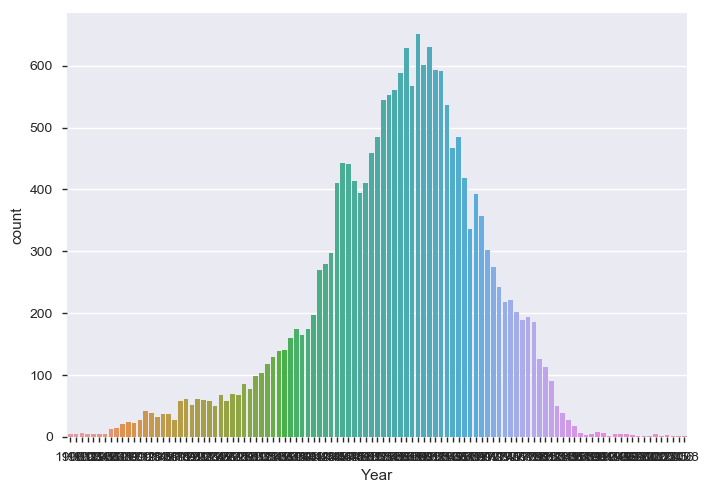

In [26]:
plot = sns.countplot(x="Year", data=df)


In [27]:
plot